this is code for taking a target name and producing a similar lightcurve relative to our models inputs

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt

search_result = lk.search_lightcurve('Kepler-8', author='Kepler', exptime=1800)
print(search_result)
lc_collection = search_result.download_all()

SearchResult containing 18 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 00 2009 Kepler    1800 kplr006922244      0.0
  1 Kepler Quarter 01 2009 Kepler    1800 kplr006922244      0.0
  2 Kepler Quarter 02 2009 Kepler    1800 kplr006922244      0.0
  3 Kepler Quarter 03 2009 Kepler    1800 kplr006922244      0.0
  4 Kepler Quarter 04 2010 Kepler    1800 kplr006922244      0.0
  5 Kepler Quarter 05 2010 Kepler    1800 kplr006922244      0.0
  6 Kepler Quarter 06 2010 Kepler    1800 kplr006922244      0.0
  7 Kepler Quarter 07 2010 Kepler    1800 kplr006922244      0.0
  8 Kepler Quarter 08 2011 Kepler    1800 kplr006922244      0.0
  9 Kepler Quarter 09 2011 Kepler    1800 kplr006922244      0.0
 10 Kepler Quarter 10 2011 Kepler    1800 kplr006922244      0.0
 11 Kepler Quarter 11 2012 Kepler    1800 kplr0

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

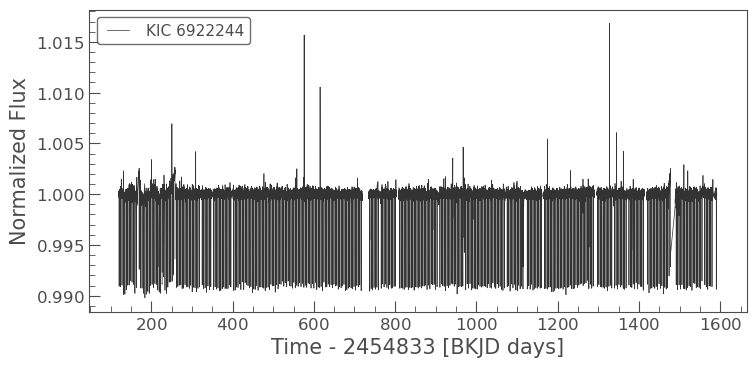

In [2]:
lc_stitched = lc_collection.stitch()
lc_stitched.plot()

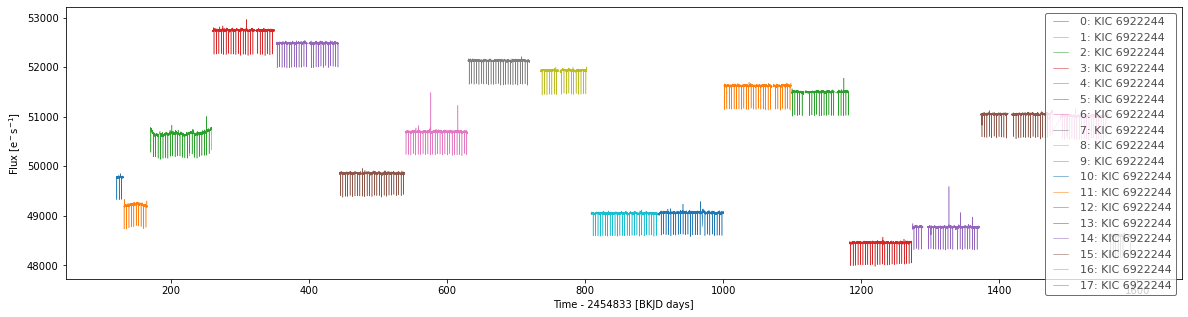

In [3]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax);

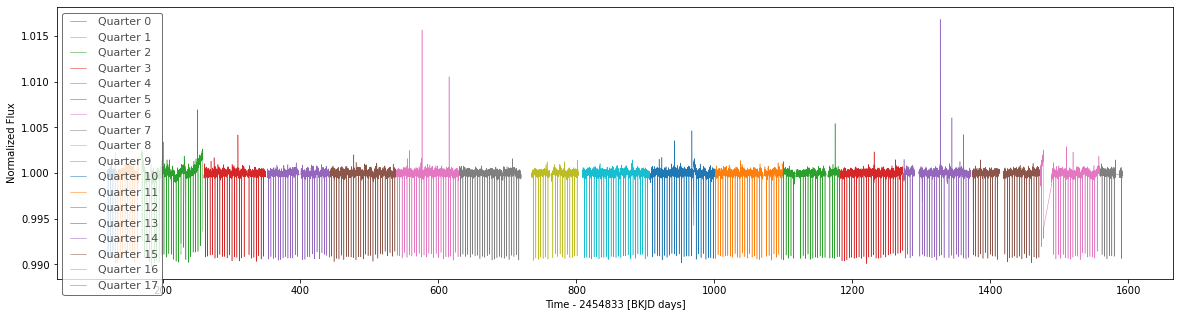

In [4]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
  lc.normalize().plot(ax=ax, label=f'Quarter {lc.quarter}');

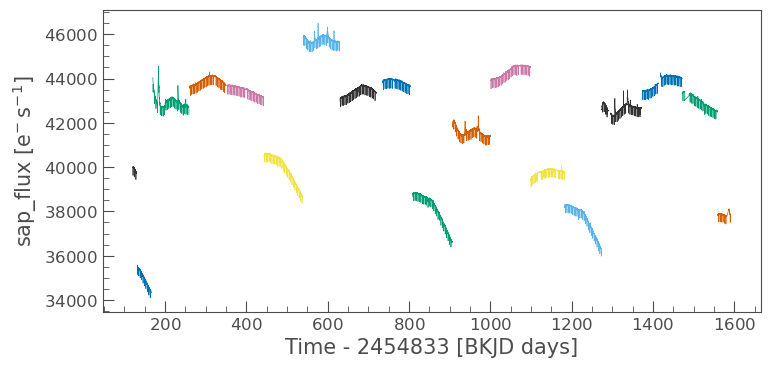

In [5]:
ax = lc_collection[0].plot(column='sap_flux', label=None)
for lc in lc_collection[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)

<AxesSubplot:title={'center':'Target ID: 3733346, Cadence: 1105'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

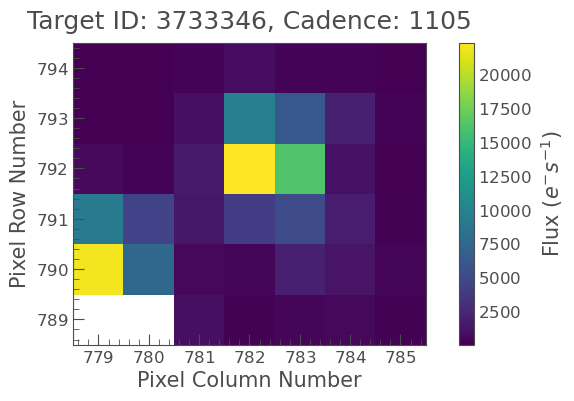

In [6]:
search_result_2 = lk.search_targetpixelfile('KIC 3733346')
tpf = search_result_2[0].download()
tpf.plot()